
<h1 style='font-size: 35px; color: crimson; font-family: Colonna MT; text-align: center; font-weight: 600'>Exploratory Data Analysis (EDA) of the Iris Flower Dataset | Descriptives Statistics</h1>

---

<h1 style='font-size: 20px; color: crimson; font-family: Perpetua; font-weight: 600'>1.0: Import Required Libraries</h1>

In [58]:
from scipy.stats import  skew, kurtosis 
import matplotlib.pyplot as plt  
import seaborn as sns  
import pandas as pd  
import numpy as np 
import string
import math  

import warnings  
warnings.simplefilter("ignore")  
pd.set_option('display.max_columns', 8) 
pd.set_option('display.float_format', lambda x: '%.2f' % x)
print("Libraries Loaded Successfully")

Libraries Loaded Successfully


<h1 style='font-size: 20px; color: crimson; font-family: Perpetua; font-weight: 600'>2.0: Import and Preprocessing Dataset</h1>

In [4]:
DATA_PATH = "../Datasets/iris_flower_data.csv"
df = pd.read_csv(DATA_PATH)
display(df.head(10))

,Sepal Length (cm),Sepal Width (cm),Petal Length (cm),Petal Width (cm),Species
0,5.10,3.50,1.40,0.20,setosa
1,4.90,3.00,1.40,0.20,setosa
2,4.70,3.20,1.30,0.20,setosa
3,4.60,3.10,1.50,0.20,setosa
4,5.00,3.60,1.40,0.20,setosa
5,5.40,3.90,1.70,0.40,setosa
6,4.60,3.40,1.40,0.30,setosa
7,5.00,3.40,1.50,0.20,setosa
8,4.40,2.90,1.40,0.20,setosa
9,4.90,3.10,1.50,0.10,setosa


<h1 style='font-size: 20px; color: crimson; font-family: Perpetua; font-weight: 600'>3.0: Dataset Informations/ Overview</h1>

In [59]:
df.shape

(149, 5)

In [60]:
for column in df.columns.tolist(): print(f"{'-'*15} {column}")

--------------- Sepal Length (cm)
--------------- Sepal Width (cm)
--------------- Petal Length (cm)
--------------- Petal Width (cm)
--------------- Species


In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 149 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Sepal Length (cm)  149 non-null    float64
 1   Sepal Width (cm)   149 non-null    float64
 2   Petal Length (cm)  149 non-null    float64
 3   Petal Width (cm)   149 non-null    float64
 4   Species            149 non-null    object 
dtypes: float64(4), object(1)
memory usage: 11.1+ KB


<h4 style='font-size: 18px; color: blue; font-family: Perpetua; font-weight: 600'>3.2: Columns Summary</h4>
Now, let’s explore the overall structure and information of the dataset’s columns and variables to gain a general understanding of the data. This includes examining data types, the number of entries, non-null counts, and unique values per column. This step helps identify the nature of each feature, ensures data completeness, and provides a clear foundation before diving into deeper statistical analysis or visualization.

In [8]:
def column_summary(df):
    summary_data = []
    for col_name in df.columns:
        col_dtype = df[col_name].dtype
        num_of_nulls = df[col_name].isnull().sum()
        num_of_non_nulls = df[col_name].notnull().sum()
        num_of_distinct_values = df[col_name].nunique()
        
        if num_of_distinct_values <= 10:
            distinct_values_counts = df[col_name].value_counts().to_dict()
        else:
            top_10_values_counts = df[col_name].value_counts().head(10).to_dict()
            distinct_values_counts = {k: v for k, v in sorted(top_10_values_counts.items(), key=lambda item: item[1], reverse=True)}

        summary_data.append({
            'col_name': col_name,
            'col_dtype': col_dtype,
            'num_of_nulls': num_of_nulls,
            'num_of_non_nulls': num_of_non_nulls,
            'num_of_distinct_values': num_of_distinct_values,
            'distinct_values_counts': distinct_values_counts
        })
    
    summary_df = pd.DataFrame(summary_data)
    return summary_df

summary_df = column_summary(df)
display(summary_df)

,col_name,col_dtype,num_of_nulls,num_of_non_nulls,num_of_distinct_values,distinct_values_counts
0,Sepal Length (cm),float64,0,150,35,"{5.0: 10, 6.3: 9, 5.1: 9, 6.7: 8, 5.7: 8, 6.4:..."
1,Sepal Width (cm),float64,0,150,23,"{3.0: 26, 2.8: 14, 3.2: 13, 3.4: 12, 3.1: 11, ..."
2,Petal Length (cm),float64,0,150,43,"{1.4: 13, 1.5: 13, 4.5: 8, 5.1: 8, 1.3: 7, 1.6..."
3,Petal Width (cm),float64,0,150,22,"{0.2: 29, 1.3: 13, 1.5: 12, 1.8: 12, 1.4: 8, 2..."
4,Species,object,0,150,3,"{'setosa': 50, 'versicolor': 50, 'virginica': 50}"


<h4 style='font-size: 18px; color: blue; font-family: Perpetua; font-weight: 600'>3.3: Handling Duplicates Values</h4>
Quick check for duplicate values in a dataset

In [40]:
def Handling_duplicates(df):
    Duplicates = df.duplicated().sum()
    if Duplicates != 0:
        df.drop_duplicates(inplace=True)
        return print(f'Dataset has {Duplicates} Duplicates and values was cleaned successifully....')
    else:
        print('Dataset has no Duplictes values')
Handling_duplicates(df)

Dataset has no Duplictes values


<h4 style='font-size: 18px; color: Blue; font-family: Perpetua; font-weight: 600'>3.4: Checking Missing Values</h4>

Checking for missing values is a crucial step in data analysis to assess the completeness and reliability of the dataset. This involves identifying any columns with null or empty entries, which may affect the accuracy of statistical and machine learning models.

In [11]:
def Missig_values_info(df):   
    isna_df = df.isna().sum().reset_index(name='Missing Values Counts')
    isna_df['Proportions (%)'] = isna_df['Missing Values Counts']/len(df)*100
    return isna_df
    
isna_df = Missig_values_info(df)
isna_df

,index,Missing Values Counts,Proportions (%)
0,Sepal Length (cm),0,0.00
1,Sepal Width (cm),0,0.00
2,Petal Length (cm),0,0.00
3,Petal Width (cm),0,0.00
4,Species,0,0.00


<h4 style='font-size: 18px; color: blue;  font-family: Perpetua; font-weight: 600'>3.4: Exploring Invalid Entries Dtypes</h4>

Exploring invalid entries in data types involves identifying values that do not match the expected format or category within each column. This includes detecting inconsistencies such as numerical values in categorical fields, incorrect data formats, or unexpected symbols and typos. Invalid entries can lead to errors in analysis and model performance, making it essential to standardize data types and correct anomalies.

In [12]:
def simplify_dtype(dtype):
    if dtype in (int, float, np.number): return 'Numeric'
    elif np.issubdtype(dtype, np.datetime64): return 'Datetime'
    elif dtype == str: return 'String'
    elif dtype == type(None): return 'Missing'
    else: return 'Other'

def analyze_column_dtypes(df):
    all_dtypes = {'Numeric', 'Datetime', 'String', 'Missing', 'Other'}
    results = pd.DataFrame(index=df.columns, columns=list(all_dtypes), dtype=object).fillna('-')
    
    for column in df.columns:
        dtypes = df[column].apply(lambda x: simplify_dtype(type(x))).value_counts()
        percentages = (dtypes / len(df)) * 100
        for dtype, percent in percentages.items():
            if percent > 0:
                results.at[column, dtype] = f'{percent:.2f}%'
            else:
                results.at[column, dtype] = '-'
    return results

results = analyze_column_dtypes(df)
display(results)


,Numeric,String,Missing,Other,Datetime
Sepal Length (cm),100.00%,-,-,-,-
Sepal Width (cm),100.00%,-,-,-,-
Petal Length (cm),100.00%,-,-,-,-
Petal Width (cm),100.00%,-,-,-,-
Species,-,100.00%,-,-,-


<h1 style='font-size: 20px; font-family: Perpetua; font-weight: 600'>4.0: Detection and Handling Outliers</h1>

An outlier is a data point that significantly deviates from the rest of the dataset, appearing as an unusually high or low value. Outliers may arise from errors, data entry mistakes, or natural variations, and can distort statistical analysis and machine learning models. To maintain data integrity, outliers should be detected using methods like Z-scores, IQR, or visual tools (e.g., box plots), and then handled appropriately.

<h4 style='font-size: 15px;  font-weight: 600'>4.1: Visualize Outliers Using Boxplots</h4>

To gain a more visual and intuitive understanding of how outliers are distributed, we can use **boxplots**. Boxplots not only show the spread and center of the data but also clearly highlight outliers as individual points outside the whiskers, making it easy to see which variables and groups have more extreme values.

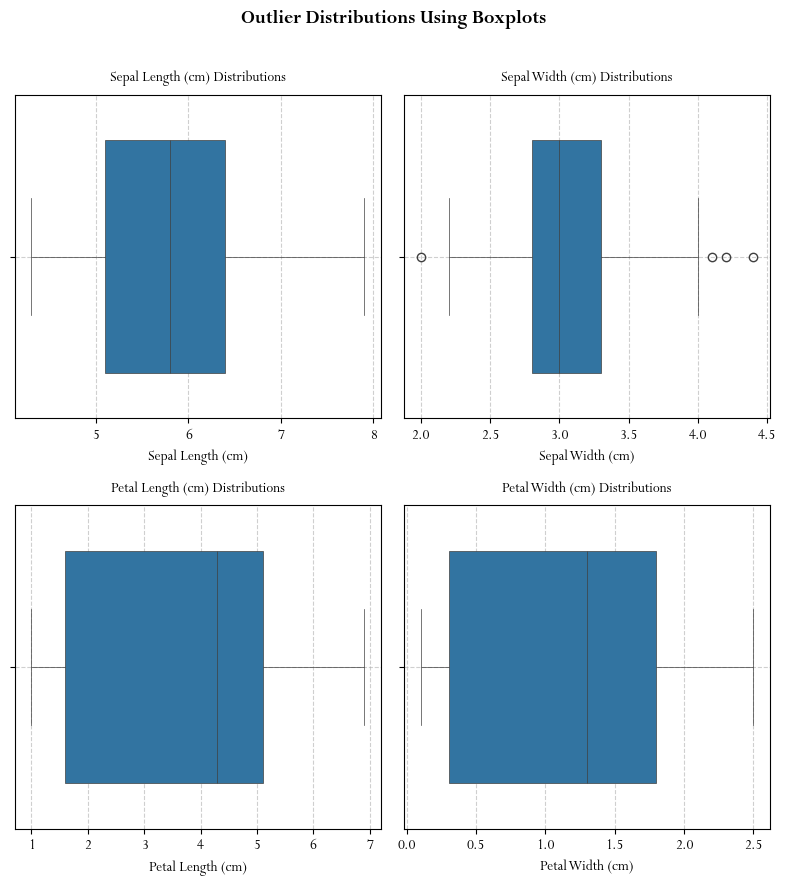

In [16]:
def plot_boxplot(df, Metrics, group_col=None):
    num_variables = len(Metrics)
    rows = math.ceil(num_variables / 3)
    cols = min(num_variables, 2)
    
    fig, axes = plt.subplots(rows, cols, figsize=(4*cols, 4.5* rows))
    plt.rcParams.update({'font.family': 'Perpetua', 'font.style': 'normal', 'font.size': 11 })
    fig.suptitle("Outlier Distributions Using Boxplots", fontsize=14, fontweight='bold')
    if group_col: fig.suptitle(f"Outlier Distributions Across {group_col} Using Boxplots", fontsize=14, fontweight='bold')

    axes = axes.flatten() if num_variables > 1 else [axes]
    
    for idx, column in enumerate(Metrics):
        sns.boxplot(data=df, x=df[column], fill=True, hue=group_col, ax=axes[idx], gap=0.1, linewidth=0.5)   
        axes[idx].set_title(f"{column} Distributions", fontsize=11, pad=10)
        axes[idx].set_xlabel(column, fontsize=11)
        axes[idx].grid(linestyle='--', alpha=0.6)
        if group_col: axes[idx].legend(frameon=False)
        
    
    for idx in range(num_variables, len(axes)):
        fig.delaxes(axes[idx])
    plt.tight_layout(rect=[0, 0, 1, 0.97])
    plt.show()
    
Metrics = df.select_dtypes(include=[np.number]).columns
plot_boxplot(df, Metrics)

The current visualizations reveal the presence of potential outliers when analyzing the overall dataset, particularly in features like sepal width. While this provides a general overview, it does not account for species-level variability. To gain a clearer and more accurate understanding, the next step is to **diagnose outliers at the group level**, examining each Iris species separately. This approach helps determine whether the observed outliers are true anomalies or simply natural variations within specific species.


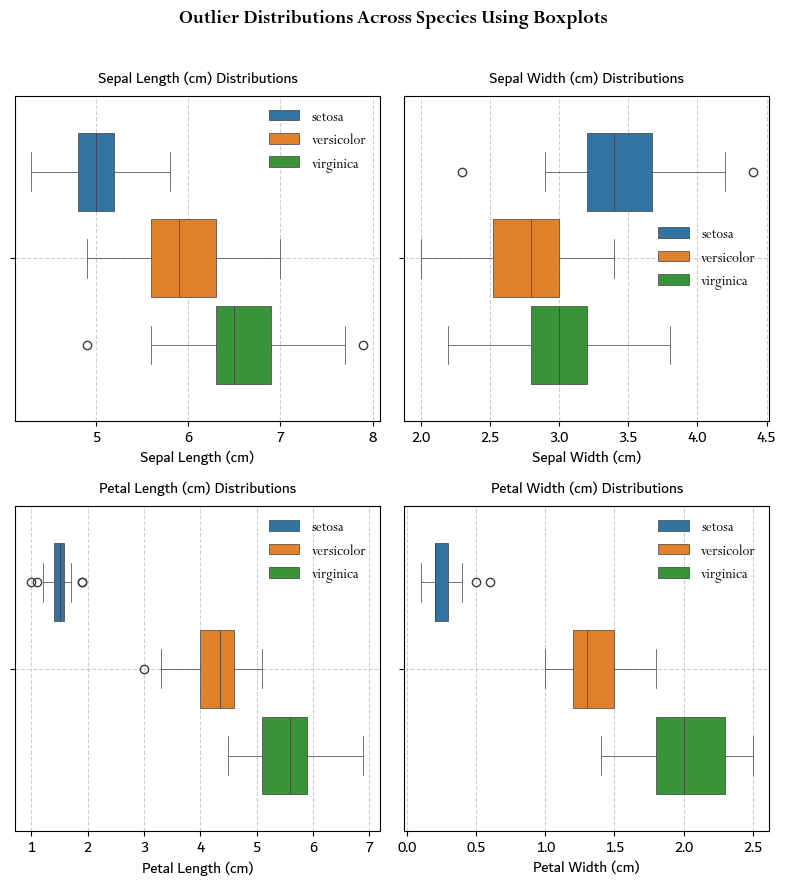

In [41]:
Metrics = df.select_dtypes(include=[np.number]).columns[:6]
plot_boxplot(df, Metrics, group_col='Species')

<h4 style='font-size: 15px;  font-weight: 600'>4.2: Explore Outlier Anomalies Using the IQR Method</h4>

Now, let’s explore outliers in our data using the Interquartile Range (IQR) method. This approach helps us identify extreme values by checking which data points fall far below or above the typical range for each variable. By detecting these anomalies, both overall and within groups, we can better understand the data’s variability and decide if any values need closer attention or cleaning.

In [43]:
def detect_outliers_overall(df):
    numeric_cols = df.select_dtypes(include='number').columns.tolist()
    outlier_counts = {}
    total_obs = df.shape[0]
    
    for col in numeric_cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        count = df[(df[col] < lower) | (df[col] > upper)].shape[0]
        outlier_counts[col] = {
            'Outlier Count': count,
            'Total Observations': total_obs,
            'Proportion (%)': round((count / total_obs) * 100, 2)
        }
    
    result = pd.DataFrame.from_dict(outlier_counts, orient='index')
    summary_row = {
        'Outlier Count': result['Outlier Count'].sum(),
        'Total Observations': total_obs,
        'Proportion (%)': round((result['Outlier Count'].sum() / (total_obs * len(numeric_cols))) * 100, 2)
    }
    result.loc['Total'] = summary_row
    
    return result

overall_outliers = detect_outliers_overall(df)
display(overall_outliers)

,Outlier Count,Total Observations,Proportion (%)
Sepal Length (cm),0,149,0.00
Sepal Width (cm),4,149,2.68
Petal Length (cm),0,149,0.00
Petal Width (cm),0,149,0.00
Total,4,149,0.67


The current implementation only returns the counts and proportions of outliers in the dataset, but it doesn’t show which specific groups those outliers belong to. To get a clearer picture, we can create plots that compare outlier distributions across groups, helping us identify which groups are most affected.

In [51]:
def detect_outliers_by_group(df, group_col):
    numeric_cols = df.select_dtypes(include='number').columns.tolist()
    results = []
    grouped = df.groupby(group_col)
    for group_name, group_df in grouped:
        group_size = len(group_df)
        group_results = {}
        
        for col in numeric_cols:
            Q1 = group_df[col].quantile(0.25)
            Q3 = group_df[col].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            is_outlier = (group_df[col] < lower_bound) | (group_df[col] > upper_bound)
            outlier_count = is_outlier.sum()
            outlier_pct = (outlier_count / group_size) * 100
            
            group_results[col] = {
                'Group 1': group_name,
                'Outlier Count': outlier_count,
                'Total Observations': group_size,
                'Outlier Proportion (%)': round(outlier_pct, 2)
            }
        
        group_df = pd.DataFrame.from_dict(group_results, orient='index')
        results.append(group_df)
    
    result_df = pd.concat(results)
    result_df = result_df.reset_index(names='Variables')
    return result_df

outliers_table = detect_outliers_by_group(df, group_col='Species')
display(outliers_table)

,Variables,Group 1,Outlier Count,Total Observations,Outlier Proportion (%)
0,Sepal Length (cm),setosa,0,50,0.00
1,Sepal Width (cm),setosa,2,50,4.00
2,Petal Length (cm),setosa,4,50,8.00
3,Petal Width (cm),setosa,2,50,4.00
4,Sepal Length (cm),versicolor,0,50,0.00
5,Sepal Width (cm),versicolor,0,50,0.00
6,Petal Length (cm),versicolor,1,50,2.00
7,Petal Width (cm),versicolor,0,50,0.00
8,Sepal Length (cm),virginica,2,49,4.08
9,Sepal Width (cm),virginica,0,49,0.00


<h1 style='font-size: 20px; font-family: Perpetua; font-weight: 600'>5.0: Statistic Description of The Datasets</h1>

Let's take a moment to quickly explore some essential statistics of our dataset. By using the `describe()` function in pandas, we can generate a summary of key metrics for each numerical column in the dataset. This gives us a bird's-eye view of the data, helping us understand the general distribution and characteristics of the values.

In [63]:
summary_stats = df.describe().reset_index(names='Statistics')
summary_stats

,Statistics,Sepal Length (cm),Sepal Width (cm),Petal Length (cm),Petal Width (cm)
0,count,149.00,149.00,149.00,149.00
1,mean,5.84,3.06,3.75,1.19
2,std,0.83,0.44,1.77,0.76
3,min,4.30,2.00,1.00,0.10
4,25%,5.10,2.80,1.60,0.30
5,50%,5.80,3.00,4.30,1.30
6,75%,6.40,3.30,5.10,1.80
7,max,7.90,4.40,6.90,2.50


<h4 style='font-size: 18px; color: blue; font-family: Perpetua; font-weight: 600'>5.1:  Distribution of Continuous variables</h4>

Let’s explore the distribution of continuous variables in our dataset by examining key statistics. The **Mean** gives us the average value, while the **Median** provides the middle value, offering a more robust measure against outliers. The **Mode** identifies the most frequent value. **Standard Deviation** and **Variance** show how much the data deviates from the mean, with larger values indicating greater spread. The **Range** reveals the difference between the maximum and minimum values, while **Skewness** measures the symmetry of the distribution. Lastly, **Kurtosis** tells us about the presence of outliers by analyzing the "tailedness" of the distribution. Together, these metrics give us a comprehensive view of how the data is distributed and guide us in identifying any potential issues like skewness or outliers.

In [52]:
def compute_overall_distribution_stats(df):
    results = []
    for col in df.select_dtypes(include=[np.number]).columns:
        mean = df[col].mean()
        median = df[col].median()
        mode = df[col].mode().iloc[0] if not df[col].mode().empty else np.nan
        std_dev = df[col].std()
        variance = df[col].var()
        value_range = df[col].max() - df[col].min()
        skewness_val = skew(df[col], nan_policy='omit')  # Skewness
        kurtosis_val = kurtosis(df[col], nan_policy='omit')  # Kurtosis


        results.append({
            'Parameter': col,
            'Mean': mean,
            'Median': median,
            'Mode': mode,
            'Standard Deviation': std_dev,
            'Variance': variance,
            'Range': value_range,
            'Skewness': skewness_val,
            'Kurtosis': kurtosis_val
        })

    
    result_df = pd.DataFrame(results)
    return result_df

pd.set_option('display.max_columns', 10) 
Continuous_variables_distribution = compute_overall_distribution_stats(df)
Continuous_variables_distribution

,Parameter,Mean,Median,Mode,Standard Deviation,Variance,Range,Skewness,Kurtosis
0,Sepal Length (cm),5.84,5.80,5.00,0.83,0.69,3.60,0.31,-0.59
1,Sepal Width (cm),3.06,3.00,3.00,0.44,0.19,2.40,0.30,0.18
2,Petal Length (cm),3.75,4.30,1.40,1.77,3.13,5.90,-0.26,-1.40
3,Petal Width (cm),1.19,1.30,0.20,0.76,0.58,2.40,-0.09,-1.34


<h4 style='font-size: 18px; color: blue; font-family: Perpetua; font-weight: 600'>5.2:  Group-wise Distribution of Continuous variables</h4>

The function below computes these statistics for each numerical column in the dataset, grouped by the values in the specified `group_column`. The result is returned in a DataFrame where each row corresponds to a group and contains the calculated statistics for each numerical column. This function is useful for analyzing how the distribution of data varies across different groups within a dataset.

In [64]:
def group_distribution_stats(df, group_column):
    results = []
    grouped = df.groupby(group_column)
    for col in df.select_dtypes(include=[np.number]).columns:
        if col != group_column:
            for group_name, group_data in grouped:
                mean = group_data[col].mean()
                median = group_data[col].median()
                mode = group_data[col].mode().iloc[0] if not group_data[col].mode().empty else np.nan
                std_dev = group_data[col].std()
                variance = group_data[col].var()
                cv = group_data[col].std() / group_data[col].mean() * 100  # Coefficient of Variation
                value_range = group_data[col].max() - group_data[col].min()
                
        
                skewness_val = skew(group_data[col], nan_policy='omit')  # Skewness
                kurtosis_val = kurtosis(group_data[col], nan_policy='omit')  # Kurtosis
                
                
                n = len(group_data[col])  # Sample size
                sem = std_dev / np.sqrt(n) if n > 1 else np.nan  # Standard error of the mean

                # Append the results to the list
                results.append({
                    group_column: group_name,
                    'Variables': col,
                    'Mean': mean,
                    'SEM': sem,
                    'Median': median,
                    'Mode': mode,
                    'Standard Deviation': std_dev,
                    'Variance': variance,
                    'Coefficient of Variation': cv,
                    'Range': value_range,
                    'Skewness': skewness_val,
                    'Kurtosis': kurtosis_val,
                })

    result_df = pd.DataFrame(results)
    return result_df

group_column = 'Species'
RESULTS = group_distribution_stats(df, group_column)
display(RESULTS)

,Species,Variables,Mean,SEM,...,Coefficient of Variation,Range,Skewness,Kurtosis
0,setosa,Sepal Length (cm),5.01,0.05,...,7.04,1.50,0.12,-0.35
1,versicolor,Sepal Length (cm),5.94,0.07,...,8.70,2.10,0.10,-0.60
2,virginica,Sepal Length (cm),6.60,0.09,...,9.57,3.00,0.08,-0.02
3,setosa,Sepal Width (cm),3.43,0.05,...,11.06,2.10,0.04,0.74
4,versicolor,Sepal Width (cm),2.77,0.04,...,11.33,1.40,-0.35,-0.45
5,virginica,Sepal Width (cm),2.98,0.05,...,10.85,1.60,0.32,0.52
6,setosa,Petal Length (cm),1.46,0.02,...,11.88,0.90,0.10,0.80
7,versicolor,Petal Length (cm),4.26,0.07,...,11.03,2.10,-0.59,-0.07
8,virginica,Petal Length (cm),5.56,0.08,...,9.96,2.40,0.50,-0.28
9,setosa,Petal Width (cm),0.25,0.01,...,42.84,0.50,1.22,1.43


<h4 style='font-size: 18px; color: Blue; font-family: Perpetua; font-weight: 600'>5.3: Species-wise Comparatives Analysis </h4>

Now, let’s turn our attention to comparing the means of variables across different specified groups. This approach helps us understand how each variable behaves within various categories or groups. For instance, we might explore how the average outcome of a variable changes across different specie. Such comparisons allow us to identify any significant differences between groups, uncovering patterns or trends that could be crucial for deeper analysis. By analyzing these mean comparisons, we gain valuable insights into the relationships between variables and groups.

In [65]:
def summary_stats(df, group=''):
    Metrics = df.select_dtypes(include=np.number).columns.tolist()
    df_without_location = df.drop(columns=[group])
    grand_mean = df_without_location[Metrics].mean()
    sem = df_without_location[Metrics].sem()
    cv = df_without_location[Metrics].std() / df_without_location[Metrics].mean() * 100
    grouped = df.groupby(group)[Metrics].agg(['mean', 'sem']).reset_index()
    
    summary_df = pd.DataFrame()
    for col in Metrics:
        summary_df[col] = grouped.apply(
            lambda x: f"{x[(col, 'mean')]:.2f} ± {x[(col, 'sem')]:.2f}", axis=1
        )
    
    summary_df.insert(0, group, grouped[group])
    grand_mean_row = ['Grand Mean'] + grand_mean.tolist()
    sem_row = ['SEM'] + sem.tolist()
    cv_row = ['%CV'] + cv.tolist()
    
    summary_df.loc[len(summary_df)] = grand_mean_row
    summary_df.loc[len(summary_df)] = sem_row
    summary_df.loc[len(summary_df)] = cv_row
    
    return summary_df


results = summary_stats(df, group='Species')
results

,Species,Sepal Length (cm),Sepal Width (cm),Petal Length (cm),Petal Width (cm)
0,setosa,5.01 ± 0.05,3.43 ± 0.05,1.46 ± 0.02,0.25 ± 0.01
1,versicolor,5.94 ± 0.07,2.77 ± 0.04,4.26 ± 0.07,1.33 ± 0.03
2,virginica,6.60 ± 0.09,2.98 ± 0.05,5.56 ± 0.08,2.03 ± 0.04
3,Grand Mean,5.84,3.06,3.75,1.19
4,SEM,0.07,0.04,0.14,0.06
5,%CV,14.22,14.26,47.15,63.84


<h4 style='font-size: 18px; color: Blue; font-family: Perpetua; font-weight: 600'>5.4: Distributions of Categorical Variables</h4>

Now, let’s explore the counts and proportions of categorical variables, both individually and across different groups. Counts indicate how frequently each category appears, providing insight into the overall distribution. Proportions, on the other hand, show the relative frequency of each category compared to the total, helping to identify balance or imbalance. Examining these aspects across groups can reveal patterns and relationships that may be important for further analysis. This exploration is essential for understanding the structure and distribution of categorical variables.

In [67]:
def Distributions_of_Categorical_Variables(df, categories):
    data = []
    for category in categories:
        counts = df[category].value_counts()
        proportions = df[category].value_counts(normalize=True)
        for value, count in counts.items():
            proportion = proportions[value]
            data.append({
                'Category': category,
                'Sub-category': value,
                'Counts': count,
                'Proportion': f"{proportion:.2%}" 
            })
    
    result_df = pd.DataFrame(data)
    return result_df

categories = df.select_dtypes(include=['object']).columns
Distributions_of_Categorical_Variables = Distributions_of_Categorical_Variables(df, categories)
Distributions_of_Categorical_Variables

,Category,Sub-category,Counts,Proportion
0,Species,setosa,50,33.56%
1,Species,versicolor,50,33.56%
2,Species,virginica,49,32.89%


<h1 style='font-size: 20px; color: Green; font-family: Candara; font-weight: 600'>7.0: Exploration of Data Distribution (Visualizations)</h1>

To gain more intuitive insights, let's explore the data distribution through visualizations. Visual tools like histograms, box plots, and scatter plots help us easily identify patterns, trends, and outliers in the data. These visuals provide a clear representation of how data is spread across variables, allowing for quicker interpretation and a deeper understanding of the dataset’s structure and relationships.

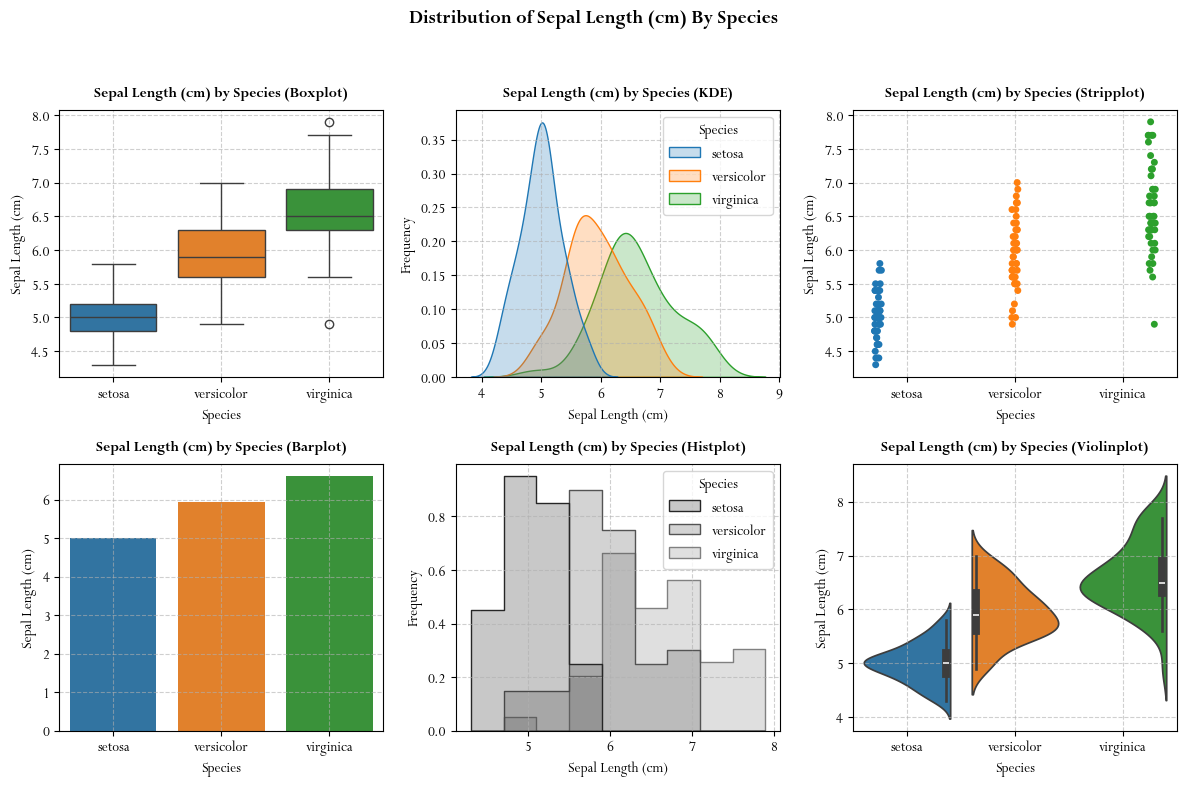

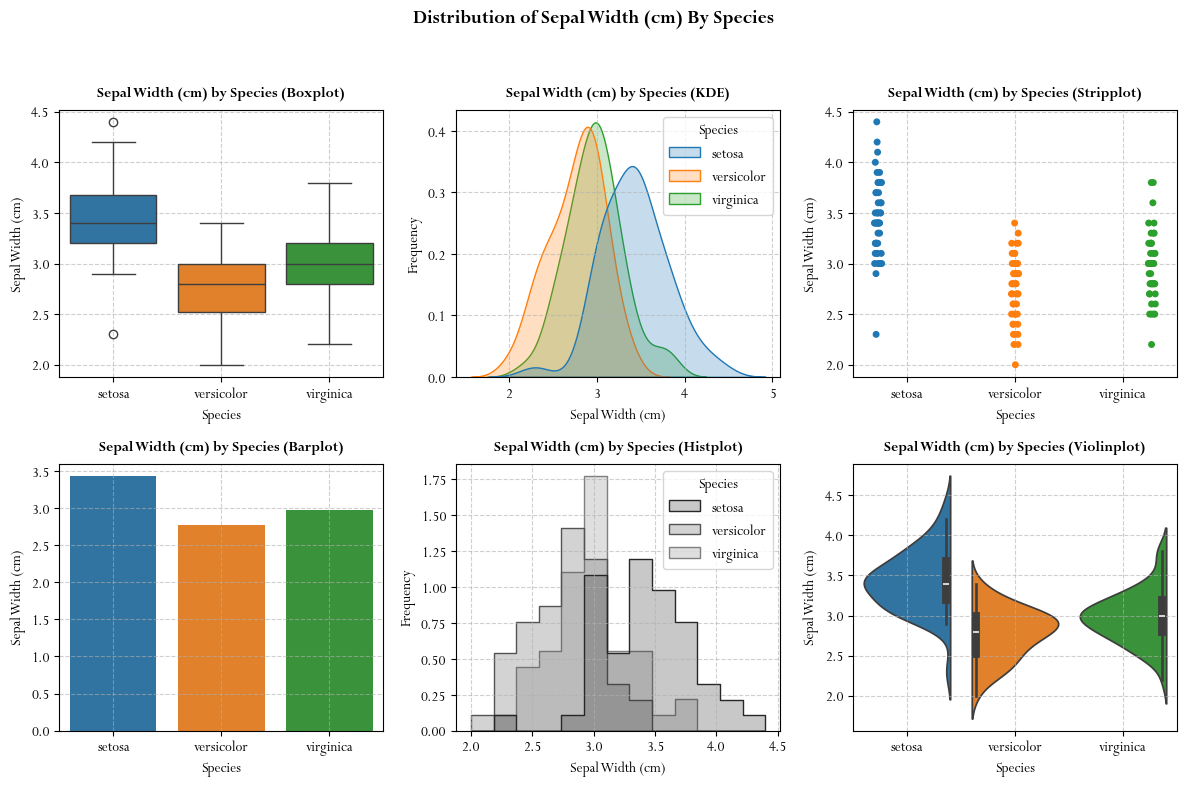

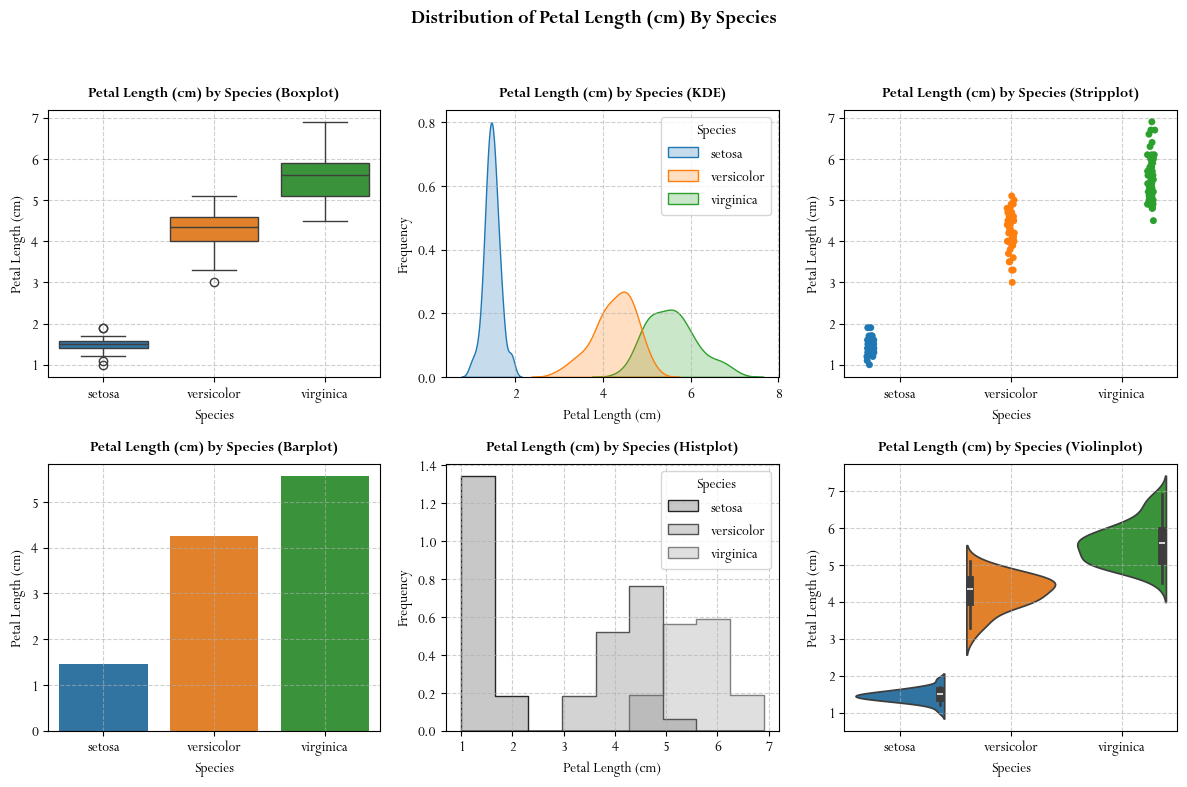

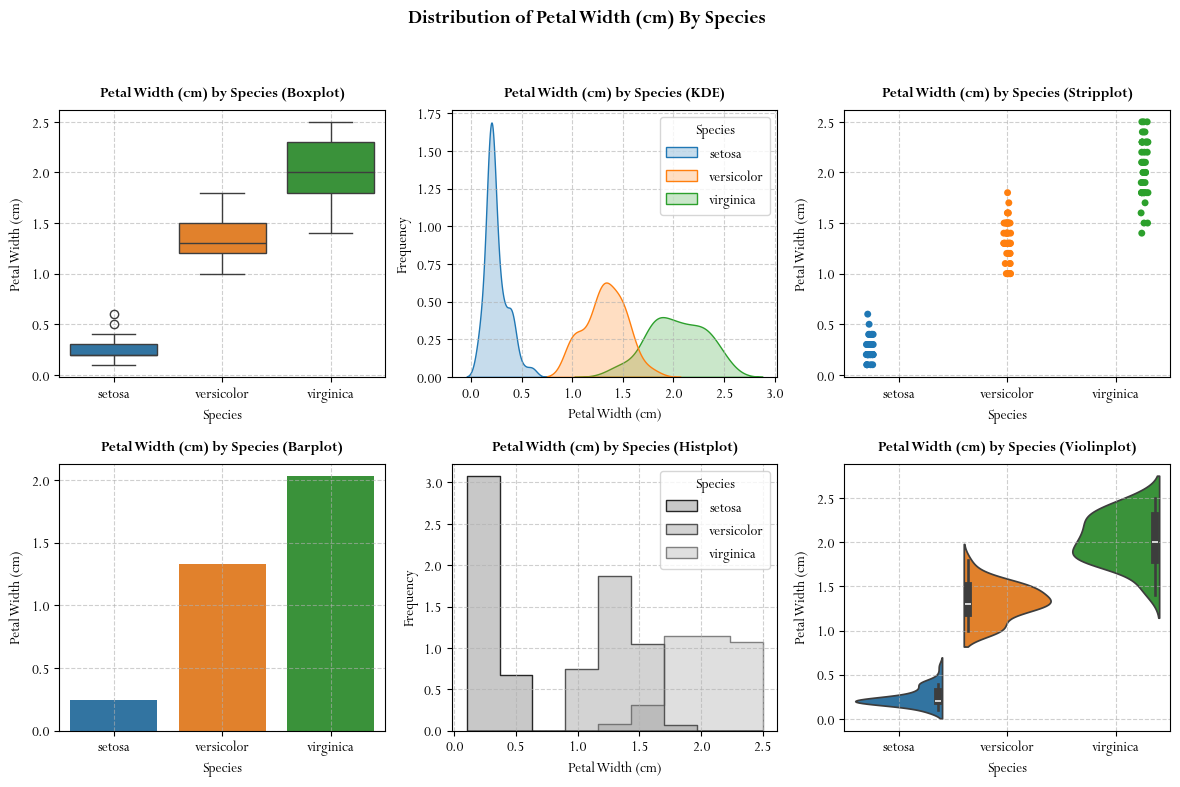

In [69]:
def create_distribution_plots(df, column, group = None, save_path=None):
    fig, axes = plt.subplots(2, 3, figsize=(12, 8))
    plt.rcParams.update({'font.family': 'Perpetua', 'font.style': 'normal', 'font.size': 11})
    fig.suptitle(f'Distribution of {column} By {group}', fontsize=14, fontweight='bold')
    
    plot_types = [
        ('Boxplot', sns.boxplot, {'x': group, 'y': column, 'hue': group}),
        ('KDE', sns.kdeplot, {'x': column, 'hue': group, 'fill': True}),
        ('Stripplot', sns.stripplot, {'x': group, 'y': column, 'hue': group, 'dodge': True}),
        ('Barplot', sns.barplot, {'x': group, 'y': column, 'hue': group, 'errorbar': None}),
        ('Histplot', sns.histplot, {'x': column, 'hue': group, 'palette': 'dark:gray', 'element': 'step', 'stat': 'density', 'common_norm': False}),
        ('Violinplot', sns.violinplot, {'x': group, 'y': column, 'hue': group, 'split': True})
    ]
    

    for idx, (title, plot_func, plot_kwargs) in enumerate(plot_types):
        row, col = divmod(idx, 3)
        plot_func(data=df, ax=axes[row, col], **plot_kwargs)
        axes[row, col].set_title(f"{column} by {group} ({title})", fontsize=11, fontweight='bold', pad=10)
        axes[row, col].set_xlabel(column if 'x' in plot_kwargs and plot_kwargs['x'] == column else group)
        axes[row, col].set_ylabel('Frequency' if 'y' not in plot_kwargs else column)
        axes[row, col].grid(linestyle='--', alpha=0.6)
    
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    if save_path: plt.savefig(save_path)
    plt.show()

Metrics = df.select_dtypes(include='number').columns.tolist()
for column in Metrics:
    create_distribution_plots(df, column, group ='Species')

***To explore distributions of measurements we can use ``swarmplot`` to visualize datapoits***

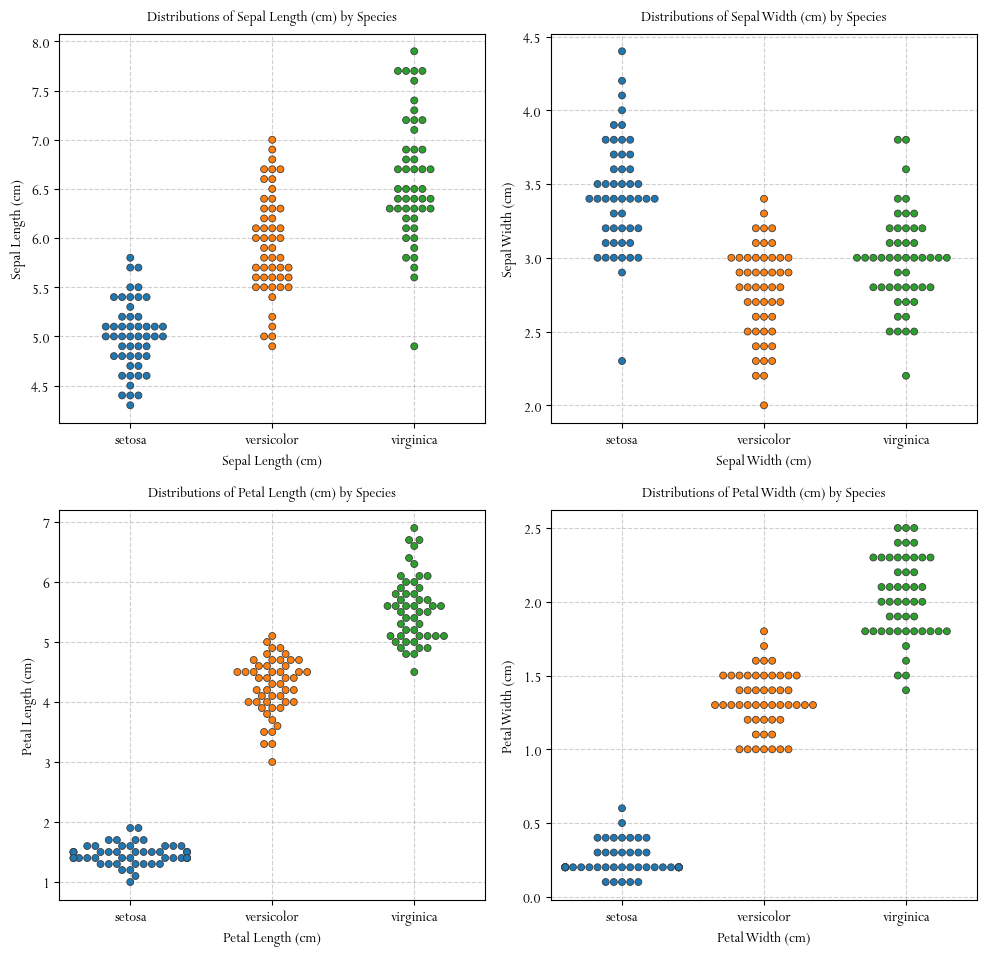

In [57]:
def swarmplot(df, Variables, group):
    num_variables = len(Variables)
    rows = math.ceil(num_variables / 3)
    cols = min(num_variables, 2)
    
    fig, axes = plt.subplots(rows, cols, figsize=(5*cols, 5*rows))
    plt.rcParams.update({'font.family': 'Dubai', 'font.style': 'normal', 'font.size': 11 })
    axes = axes.flatten() if num_variables > 1 else [axes]
    
    for idx, column in enumerate(Variables):
        sns.swarmplot(data=df, x=df[group], y=df[column], ax=axes[idx], hue=group, linewidth=0.6)   
        axes[idx].set_title(f"Distributions of {column} by {group}", fontsize=11, pad=10)
        axes[idx].set_xlabel(column, fontsize=11)
        axes[idx].grid(linestyle='--', alpha=0.6)
    
    for idx in range(num_variables, len(axes)):
        fig.delaxes(axes[idx])
    plt.tight_layout(rect=[0, 0, 1, 0.97])
    plt.show()

Variables = df.select_dtypes(include='number').columns.tolist()
swarmplot(df, Variables=Variables, group='Species')

---

This analysis was performed by **Jabulente**, a passionate and dedicated data scientist with a strong commitment to using data to drive meaningful insights and solutions.

---

<h5 style='font-size: 65px; color: crimson; font-family: Colonna MT; font-weight: 600; text-align: center'>THE END</h5>